In [1]:
import cftime
import nc_time_axis
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import xarray as xr 

from src import utils, models, cesm_utils, plots
from src.inputs import * 

%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
# List of CESM2 Ensemble Members
CESM2_SSP245_ensemble_members = models.CESM2_SSP245_ensemble_members
CESM2_SSP585_ensemble_members = models.CESM2_SSP585_ensemble_members 
LENS2_members_for_CESM2_SSP245 = models.LENS2_members_for_CESM2_SSP245 
LENS2_members_for_CESM2_SSP585 = models.LENS2_members_for_CESM2_SSP585 

In [3]:
# For each list of ensemble members above, load Niño3.4 SSTs and MSEA prect
ssp2_prect_list = cesm_utils.process_cesm_ensemble(
    CESM2_SSP245_ensemble_members, 
    CESM2_SSP245_dir, 
    "PRECT.MSEA")

ssp2_sst_list = cesm_utils.process_cesm_ensemble(
    CESM2_SSP245_ensemble_members, 
    CESM2_SSP245_dir, 
    "SST.Nino34")

ssp3_prect_list1 = cesm_utils.process_cesm_ensemble(
    LENS2_members_for_CESM2_SSP245, 
    CESM2_LENS2_dir, 
    "PRECT.MSEA")

ssp3_sst_list1 = cesm_utils.process_cesm_ensemble(
    LENS2_members_for_CESM2_SSP245, 
    CESM2_LENS2_dir, 
    "SST.Nino34")

ssp5_prect_list = cesm_utils.process_cesm_ensemble(
    CESM2_SSP585_ensemble_members, 
    CESM2_SSP585_dir, 
    "PRECT.MSEA")

ssp5_sst_list = cesm_utils.process_cesm_ensemble(
    CESM2_SSP585_ensemble_members, 
    CESM2_SSP585_dir, 
    "SST.Nino34")

ssp3_prect_list2 = cesm_utils.process_cesm_ensemble(
    LENS2_members_for_CESM2_SSP585, 
    CESM2_LENS2_dir, 
    "PRECT.MSEA")

ssp3_sst_list2 = cesm_utils.process_cesm_ensemble(
    LENS2_members_for_CESM2_SSP585, 
    CESM2_LENS2_dir, 
    "SST.Nino34") 


In [4]:
# Concatenate the above lists
ssp2_prect_ds = xr.concat(ssp2_prect_list, dim='ensemble')
ssp2_sst_ds = xr.concat(ssp2_sst_list, dim='ensemble')

ssp3_prect_ds1 = xr.concat(ssp3_prect_list1, dim='ensemble')
ssp3_sst_ds1 = xr.concat(ssp3_sst_list1, dim='ensemble')

ssp5_prect_ds = xr.concat(ssp5_prect_list, dim='ensemble')
ssp5_sst_ds = xr.concat(ssp5_sst_list, dim='ensemble')

ssp3_prect_ds2 = xr.concat(ssp3_prect_list2, dim='ensemble')
ssp3_sst_ds2 = xr.concat(ssp3_sst_list2, dim='ensemble')


In [5]:
# Extract historical PRECT/SST from SSP3
hist_prect_ds1 = ssp3_prect_ds1.sel(time=slice('1900','2014'))
hist_sst_ds1 = ssp3_sst_ds1.sel(time=slice('1900','2014'))

hist_prect_ds2 = ssp3_prect_ds2.sel(time=slice('1900','2014'))
hist_sst_ds2 = ssp3_sst_ds2.sel(time=slice('1900','2014'))

# Extract future PRECT/SST from SSP2 and SSP5
ssp2_prect_ds = ssp2_prect_ds.sel(time=slice('2015','2100'))
ssp2_sst_ds = ssp2_sst_ds.sel(time=slice('2015','2100'))

ssp5_prect_ds = ssp5_prect_ds.sel(time=slice('2015','2100'))
ssp5_sst_ds = ssp5_sst_ds.sel(time=slice('2015','2100'))

In [6]:
# Transpose for alignment
hist_sst_da1 = hist_sst_ds1.transpose('time','ensemble')
hist_sst_da2 = hist_sst_ds2.transpose('time','ensemble')

hist_prect_da1 = hist_prect_ds1.transpose('time','ensemble')
hist_prect_da2 = hist_prect_ds2.transpose('time','ensemble')

ssp2_sst_da = ssp2_sst_ds.transpose('time','ensemble')
ssp2_prect_da = ssp2_prect_ds.transpose('time','ensemble')

ssp5_sst_da = ssp5_sst_ds.transpose('time','ensemble')
ssp5_prect_da = ssp5_prect_ds.transpose('time','ensemble')

In [7]:
# Concatenate Historical and Future
hist_ssp2_sst_da = xr.concat([hist_sst_da1, ssp2_sst_da], dim='time')
hist_ssp2_prect_da = xr.concat([hist_prect_da1, ssp2_prect_da], dim='time')

hist_ssp5_sst_da = xr.concat([hist_sst_da2, ssp5_sst_da], dim='time')
hist_ssp5_prect_da = xr.concat([hist_prect_da2, ssp5_prect_da], dim='time')

In [9]:
# Calculate 13-year running correlations
N=13

ssp2_correlations = [] # SSP2
ssp5_correlations = [] # SSP5

for i in range(16):
    corr_lead1 = utils.get_running_corr(
        hist_ssp2_prect_da.isel(ensemble=i), 
        hist_ssp2_sst_da.isel(ensemble=i).shift(time=1), 
        window=N)
    ssp2_correlations.append(corr_lead1)

    if i != 15:
        corr_lead2 = utils.get_running_corr(
            hist_ssp5_prect_da.isel(ensemble=i), 
            hist_ssp5_sst_da.isel(ensemble=i).shift(time=1), 
            window=N)
        ssp5_correlations.append(corr_lead2)

ssp2_correlations_ds = xr.concat(ssp2_correlations, dim='ensemble') # SSP2
ssp5_correlations_ds = xr.concat(ssp5_correlations, dim='ensemble') # SSP5

[Text(0, -1.0, ''),
 Text(0, -0.5, ''),
 Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, '')]

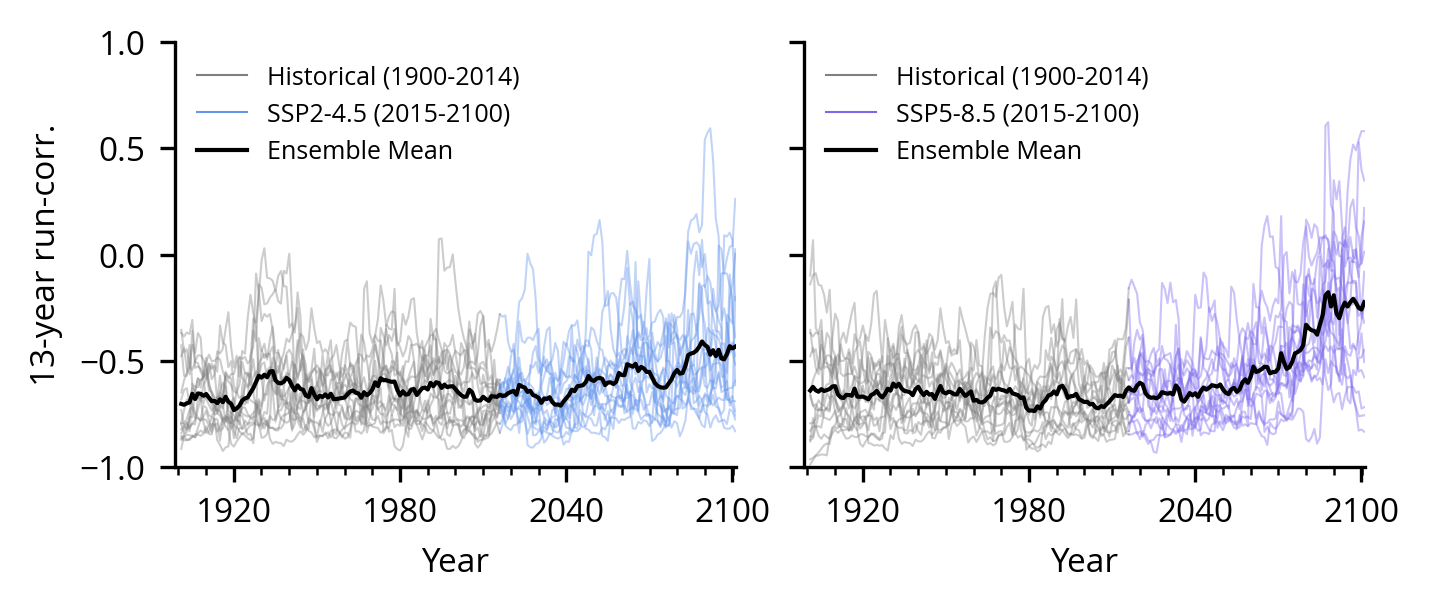

In [10]:
%matplotlib inline 

utils.set_matplotlib_font("Open Sans")
mpl.rcParams.update({
    'font.size': 8, 
    'axes.titlesize': 8, 
    'axes.labelsize': 8,
    'xtick.labelsize': 8, 
    'ytick.labelsize': 8, 
    'legend.fontsize': 8,
    'figure.titlesize': 8
})

fig_width_cm = 12
fig_height_cm = 4.5
fig_width_in = fig_width_cm / 2.54
fig_height_in = fig_height_cm / 2.54

fig = plt.figure(figsize=(fig_width_in, fig_height_in), dpi=300, constrained_layout=True)

gs1 = GridSpec(1, 2, top=0.95, bottom=0.15, left=0.12, right=0.96, hspace=0.5, wspace=0.12)

ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])

ax1 = plots.plot_runcorr_cesm_timeseries(ssp2_correlations_ds, 
                                 ax1, 
                                 future_color="cornflowerblue",
                                 forcing_label="SSP2-4.5 (2015-2100)")

ax2 = plots.plot_runcorr_cesm_timeseries(ssp5_correlations_ds, 
                                 ax2, 
                                 future_color="mediumslateblue",
                                 forcing_label="SSP5-8.5 (2015-2100)")

ax2.set_ylabel(None)
ax2.set_yticklabels([])